# Insurance Cost Analysis

### Objective: To perform data analytics on a medical insurance charges dataset

### This is in continuation to the Part-1 analysis

### The parameters used in the dataset are:

#### Age: Age of the insured. Integer quantity.

#### Gender: Gender of the insured. This parameter has been mapped to numerical values in the following way.
#### Gender	Assigned Value: Female 1, Male 2

#### BMI: Body Mass Index of the insured. Float value quantity.

#### No_of_Children: Number of children the insured person has. Integer quantity.

#### Smoker: Whether the insured person is a smoker or not. This parameter has been mapped to numerical values in the following way.
#### Smoker	Assigned Value: Non Smoker	0, Smoker	1

#### Region: Which region of the USA does the insured belong to. This parameter has been mapped to numerical values in the following way.
#### Region	Assigned Value: Northwest	1, Northeast	2, Southwest	3, Southeast	4

#### Charges: Charges for the insurance in USD. Floating value quantity.

# Key Analysis Conducted - 

### 1. What is the distribution of BMI, and medical charges?
### 2. Average medical insurance charge for different age groups
### 3. How do insurance charges differ by gender?
### 4. How does the number of children affect medical charges?
### 5. How do medical charges vary across different regions?
### 6. Do certain demographics have significantly different average charges?
####     -- Different age groups of Smokers vs Non-Smokers
####     -- Male Smokers vs. Female Smokers
####     -- BMI dependent Charges by Smoker Status

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [86]:
headers = ['Age','Gender','BMI','No_of_Children','Smoker','Region','Charges']

In [87]:
df = pd.read_csv(r"C:\Users\mrakk\OneDrive - srsny.org\Desktop\Datasets\medical_insurance_dataset.csv",names=headers,header=0)
df['Charges'] = round(df['Charges'],2)
df.head(10)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,?,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


# Clean the data, taking care of the blank entries

In [88]:
df[df[headers]=='?'].count()

Age               4
Gender            0
BMI               0
No_of_Children    0
Smoker            7
Region            0
Charges           0
dtype: int64

In [89]:
df = df.replace('?',np.NaN)

In [90]:
df.head(10)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,NaN,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## Replace Missing Age Values with the Mean and Smoker Values with the Most Frequent One

In [92]:
mean_age = df['Age'].astype('float').mean(axis=0)
mean_age

39.11709432598482

In [93]:
df['Age'].replace(np.NaN,mean_age,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [94]:
max_smoker = df['Smoker'].value_counts().idxmax()
max_smoker

'0'

In [95]:
df['Smoker'].replace(np.NaN,max_smoker,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [96]:
df[['Age','Smoker']] = df[['Age','Smoker']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


# 1. What is the distribution of BMI, and medical charges?

In [97]:
a = df['BMI'].value_counts()
b = pd.DataFrame(a)
b.reset_index()

,BMI,count
0,32.30,26
1,28.31,18
2,31.35,16
3,25.80,16
4,28.88,16
...,...,...
543,39.33,2
544,18.05,2
545,26.20,2
546,39.27,2


C:\Users\mrakk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


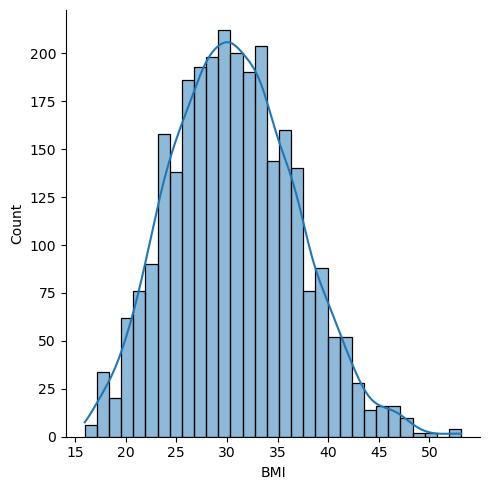

In [98]:
sns.displot(df['BMI'],kde=True)

### Most people have BMI in the range of 25 - 35

In [99]:
c = df['Charges'].value_counts()
d = pd.DataFrame(c)
d.reset_index().sort_values(by='Charges',ascending=True)

,Charges,count
29,1121.87,4
282,1131.51,2
47,1135.94,4
1121,1136.40,2
889,1137.01,2
...,...,...
272,55135.40,2
1040,58571.07,2
390,60021.40,2
454,62592.87,2


C:\Users\mrakk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


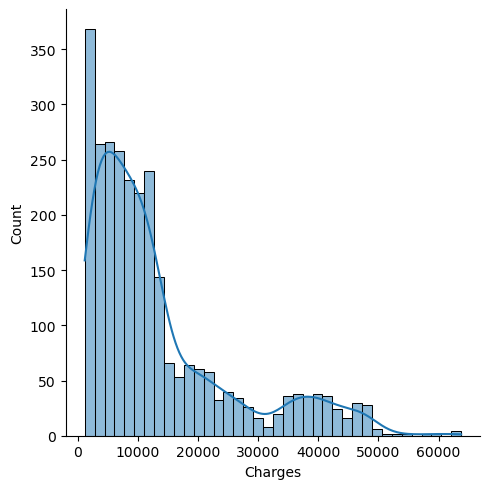

In [100]:
sns.displot(df['Charges'],kde=True)

### Most people fall in the range of USD 1,100 - USD 12,000

# 2. Average medical insurance charge for different age groups

In [171]:
df['Age_Groups'].value_counts()

Age_Groups
15-25    643
56-65    462
26-35    452
36-45    418
46-55    406
66-75    390
Name: count, dtype: int64

In [102]:
labels = ['15-25','26-35','36-45','46-55','56-65','66-75']
bins = np.linspace(min(df['Age']),max(df['Age']),7)

In [103]:
df['Age_Groups'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [104]:
df

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges,Age_Groups
0,18,2,33.770,1,0,4,1725.55,15-25
1,28,2,33.000,3,0,4,4449.46,26-35
2,33,2,22.705,0,0,1,21984.47,26-35
3,32,2,28.880,0,0,1,3866.86,26-35
4,31,1,25.740,0,0,4,3756.62,26-35
...,...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86,46-55
2767,21,1,34.600,0,0,3,2020.18,15-25
2768,19,2,26.030,1,1,1,16450.89,15-25
2769,23,2,18.715,0,0,1,21595.38,15-25


In [105]:
df_test1 = df[['Age_Groups','Charges']]
avg_insurance_per_age_group = df_test1.groupby(['Age_Groups'],as_index=False).mean()
round(avg_insurance_per_age_group,2)

,Age_Groups,Charges
0,15-25,9014.87
1,26-35,10480.37
2,36-45,11694.96
3,46-55,15728.20
4,56-65,16013.38
5,66-75,19327.23


Text(0.5, 1.0, 'Avg Charges per Age Group')

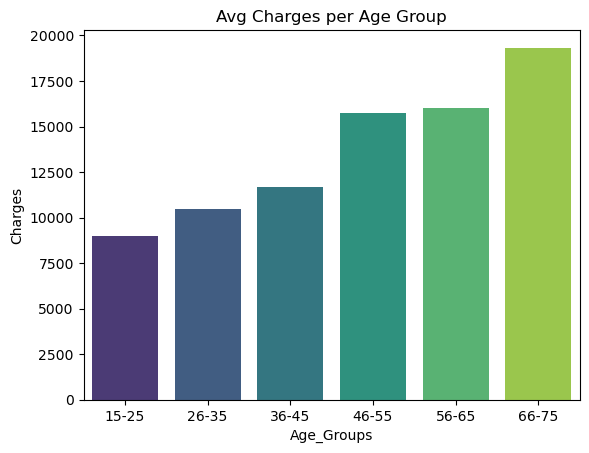

In [106]:
sns.barplot(x='Age_Groups',y='Charges',data=avg_insurance_per_age_group, palette='viridis')
plt.title('Avg Charges per Age Group')

### Age Group of 66-75 years pays highest yearly insurance charges (Average - USD 19,327.23) followed by all other groups.

# 3. How do insurance charges differ by gender?

In [107]:
df_test2 = df[['Gender','Charges']]
avg_insurance_per_gender = df_test2.groupby(['Gender'],as_index=False).mean()
avg_insurance_per_gender['Percentage'] = 100*avg_insurance_per_gender['Charges'] / avg_insurance_per_gender['Charges'].sum()

round(avg_insurance_per_gender,2)

,Gender,Charges,Percentage
0,1,12483.61,47.11
1,2,14013.87,52.89


Text(0.5, 1.0, 'Percent Charges per Gender')

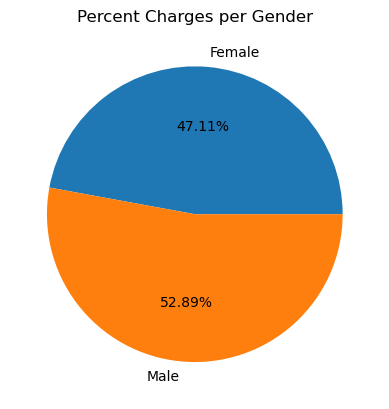

In [108]:
avg_insurance_per_gender['Gender'] = ['Female','Male']
plt.pie(x=avg_insurance_per_gender['Percentage'],data=avg_insurance_per_gender,labels=avg_insurance_per_gender['Gender'],autopct='%2.2f%%')
plt.title('Percent Charges per Gender')

### Males (USD 14,013.87) pay higher insurance charges on an average than females (USD 12,483.61).

# 4. How does the number of children affect medical charges?

In [109]:
child_charges = df[['No_of_Children','Charges']]
child_charges_group = child_charges.groupby(df['No_of_Children'],as_index=False).mean()
round(child_charges_group,2)

,No_of_Children,Charges
0,0.0,12314.07
1,1.0,12722.65
2,2.0,15268.18
3,3.0,15304.07
4,4.0,13550.98
5,5.0,8706.04


In [110]:
child_charges_group.corr()

,No_of_Children,Charges
No_of_Children,1.000000,-0.340138
Charges,-0.340138,1.000000


Text(0.5, 1.0, 'Avg Charges vs Number of Children')

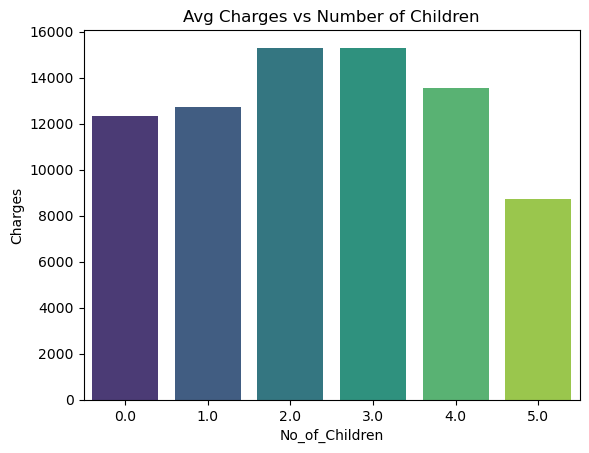

In [111]:
sns.barplot(x='No_of_Children',y='Charges',data=child_charges_group, palette='viridis')
plt.title('Avg Charges vs Number of Children')

### No correlation can be established between the insurance charges paid and the number of children per parent, as people with no children are paying higher charges vs the ones with 5 children. People with 2-3 children are paying the highest. Hence, no correlation seen which is also confirmed by the correlation table.

# 5. How do medical charges vary across different regions?

In [112]:
df_test3 = df[['Region','Charges']]
avg_insurance_per_region = df_test3.groupby(['Region'],as_index=False).mean()
avg_insurance_per_region['Percentage'] = 100*avg_insurance_per_region['Charges'] / avg_insurance_per_region['Charges'].sum()

round(avg_insurance_per_region,2)

,Region,Charges,Percentage
0,1,12463.13,23.58
1,2,13475.87,25.50
2,3,12157.28,23.01
3,4,14748.78,27.91


Text(0.5, 1.0, 'Percent Charges per Region')

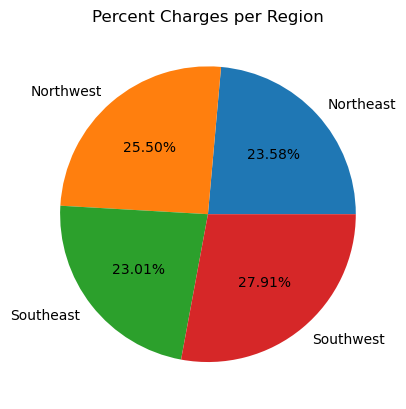

In [170]:
avg_insurance_per_region['Region'] = ['Northeast','Northwest','Southeast','Southwest']
plt.pie(x=avg_insurance_per_region['Percentage'],data=avg_insurance_per_region,labels=avg_insurance_per_region['Region'],autopct='%2.2f%%')
plt.title('Percent Charges per Region')

### Low variation of total charges can be seen among Northeast, Northwest and Souheast regions. However, Southwest has a slightly higher percent share of 27.91% in terms of insurance charges.

# 6. Do certain demographics have significantly different average charges?

###     -- Different age groups of Smokers vs Non-Smokers

In [114]:
df['Smoker_Status'] = df['Smoker'].replace({0:'Non-Smoker',1:'Smoker'})

In [115]:
df

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges,Age_Groups,Smoker_Status
0,18,2,33.770,1,0,4,1725.55,15-25,Non-Smoker
1,28,2,33.000,3,0,4,4449.46,26-35,Non-Smoker
2,33,2,22.705,0,0,1,21984.47,26-35,Non-Smoker
3,32,2,28.880,0,0,1,3866.86,26-35,Non-Smoker
4,31,1,25.740,0,0,4,3756.62,26-35,Non-Smoker
...,...,...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86,46-55,Non-Smoker
2767,21,1,34.600,0,0,3,2020.18,15-25,Non-Smoker
2768,19,2,26.030,1,1,1,16450.89,15-25,Smoker
2769,23,2,18.715,0,0,1,21595.38,15-25,Non-Smoker


In [116]:
df_test4 = df[['Age_Groups','Charges','Smoker_Status']]
avg_insurance_ag_ss = df_test4.groupby(['Age_Groups','Smoker_Status'],as_index=False).mean()
round(avg_insurance_ag_ss,2)

,Age_Groups,Smoker_Status,Charges
0,15-25,Non-Smoker,4074.49
1,15-25,Smoker,27959.18
2,26-35,Non-Smoker,5464.36
3,26-35,Smoker,28599.41
4,36-45,Non-Smoker,7142.04
5,36-45,Smoker,30931.07
6,46-55,Non-Smoker,9635.26
7,46-55,Smoker,33421.16
8,56-65,Non-Smoker,12114.68
9,56-65,Smoker,36455.22


Text(0.5, 1.0, 'Charges Paid by Different Age Groups by Smoker Status')

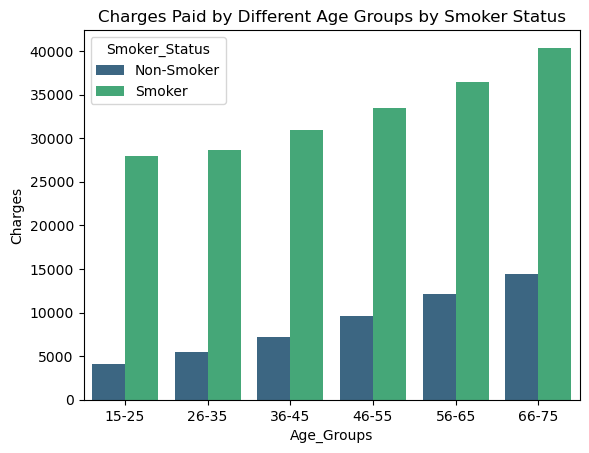

In [117]:
sns.barplot(x=avg_insurance_ag_ss['Age_Groups'],y=avg_insurance_ag_ss['Charges'],hue=avg_insurance_ag_ss['Smoker_Status'],
           data=avg_insurance_ag_ss, palette='viridis')
plt.title('Charges Paid by Different Age Groups by Smoker Status')

### The graph shows Old aged smokers paying a premium on the insurance compared to non-smokers.

###     -- Male Smokers vs. Female Smokers

In [118]:
df['Gender_Status'] = df['Gender'].replace({1:'Female',2:'Male'})
df

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges,Age_Groups,Smoker_Status,Gender_Status
0,18,2,33.770,1,0,4,1725.55,15-25,Non-Smoker,Male
1,28,2,33.000,3,0,4,4449.46,26-35,Non-Smoker,Male
2,33,2,22.705,0,0,1,21984.47,26-35,Non-Smoker,Male
3,32,2,28.880,0,0,1,3866.86,26-35,Non-Smoker,Male
4,31,1,25.740,0,0,4,3756.62,26-35,Non-Smoker,Female
...,...,...,...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86,46-55,Non-Smoker,Female
2767,21,1,34.600,0,0,3,2020.18,15-25,Non-Smoker,Female
2768,19,2,26.030,1,1,1,16450.89,15-25,Smoker,Male
2769,23,2,18.715,0,0,1,21595.38,15-25,Non-Smoker,Male


Text(0.5, 1.0, 'Insurance Charges for Male vs. Female Smokers')

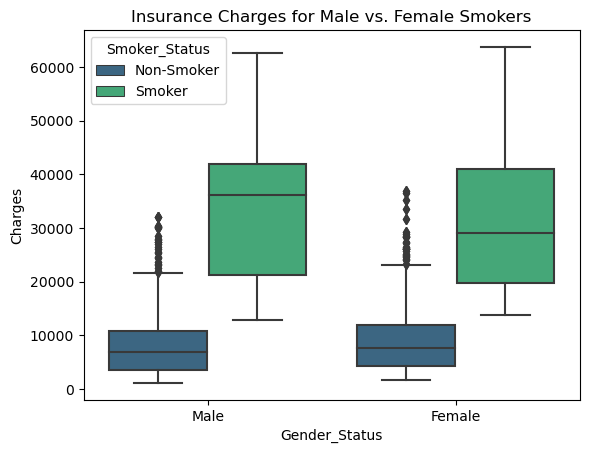

In [119]:
sns.boxplot(x='Gender_Status',y='Charges',data=df,hue='Smoker_Status',palette='viridis')
plt.title('Insurance Charges for Male vs. Female Smokers')

### Non Smoker males and females pay almost equal insurance, however, average charges paid by male smokers are higher than that of female smokers.

### -- BMI dependent Charges by Smoker Status

In [165]:
BMI_labels = ['15-25','26-35','36-45','46-55','56-65']
BMI_bins = np.linspace(min(df['BMI']),max(df['BMI']),6)
df['BMI_Groups'] = pd.cut(df['BMI'],bins=BMI_bins,labels=BMI_labels,include_lowest=True)

Text(0.5, 1.0, 'BMI Dependent Charges by Smoker Status')

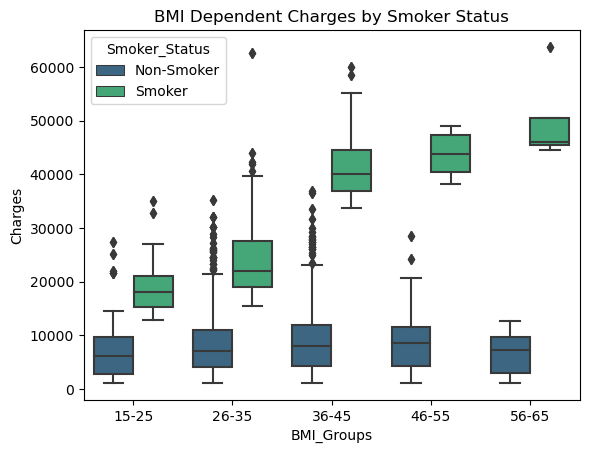

In [168]:
sns.boxplot(x='BMI_Groups',y='Charges',data=df,hue='Smoker_Status',palette='viridis')
plt.title('BMI Dependent Charges by Smoker Status')

### Non smokers across the BMI groups pay similar insurance, but high variation can be seen among the smokers from which, smokers with BMI from 36 to 65 pay the highest insurance on an average.

# Analysis:

### In-depth analysis suggests that older males especially 55 years and above who are smokers and have BMI ranging from 36 to 65 end up paying higher insurance charge on an average compared to females.

### A considerable difference of the insurance charge is seen between smokers and non-smokers in both males and females.

### As a conclusion, we can say that smoking status increases the insurance charge by many folds. This is also confirmed in our Part-1 analysis as we could see a strong positive correlation between smoking status and insurance charges compared to other variables. 

### No significant relation was discovered between the insurance charges, people having number of children and regions.